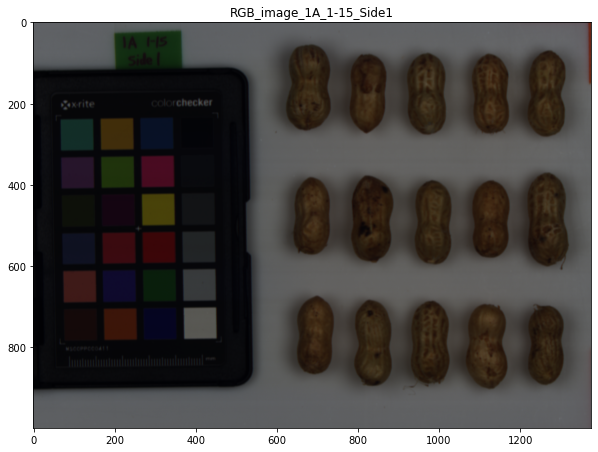

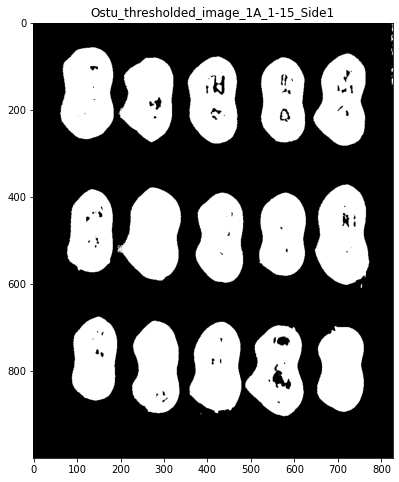

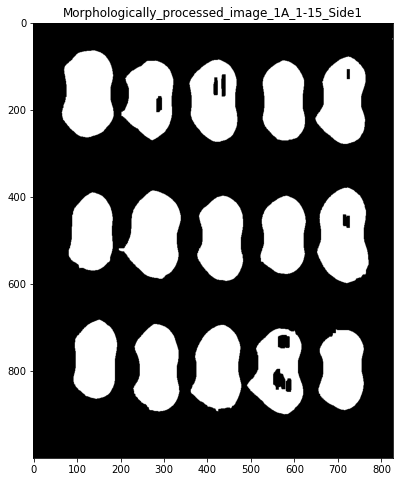

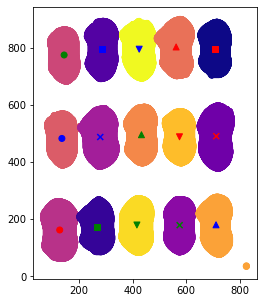

In [1]:
##1_import all library
import pandas as pd
from data_ready import *
import argparse

path="C:/Users/s_t392/Downloads";
file_name="1A_1-15_Side1_20160914_0001_cnbh (1376x1000x467)";

# parser = argparse.ArgumentParser(description='Read_path_filename')
# parser.add_argument('file_name', type=str) 
# parser.add_argument('choice', type=int) 
# args = parser.parse_args()
# file_name=args.file_name+" (1376x1000x467)"
# choice=args.choice

file=file_name[:13];
hdr_file_name=file_name+".hdr"; 
hyp_file_name=file_name+".hyp";

Peanut_HSI=hyp_image_processing(hdr_file_name,hyp_file_name,file)
Peanut_HSI.open_envi_file(path)
Peanut_HSI.BGR_imread()
Peanut_HSI.ostu_thresholding()
Peanut_HSI.Morphological_Erode(choice=0)
Peanut_HSI.find_peanut_pixel_postion()
Peanut_HSI.Peanut_Pixel_Reflectance()
Peanut_HSI.identify_peanut_by_label()
Peanut_HSI.Feature_Matrix_Creation()
Peanut_HSI.spatial_spectral_feature()

wave_length=np.arange(467)
Wavelength=wavelength_channel_conversion(wave_length,option=0)
wavelength=[str(int(i))+' nm' for i in Wavelength]
Spectral_Feature=pd.DataFrame(Peanut_HSI.Feature_Matrix,columns=wavelength)
Spatial_Spectral_Feature=pd.DataFrame(Peanut_HSI.hyp_parts_spec[1],columns=wavelength)
for i in range(1,15):
    Spatial_Spectral_Feature=pd.concat([Spatial_Spectral_Feature, pd.DataFrame(Peanut_HSI.hyp_parts_spec[i],columns=wavelength)],axis=0)

pd.DataFrame.to_csv(Spectral_Feature,'Spectral.csv')
pd.DataFrame.to_csv(Spatial_Spectral_Feature,'Spatial_spectral.csv')